## Correlation Analysis in between features and features versus continuous metadata

**Author**: Madeleine Ernst (mernst@ucsd.edu) adapted from Ricardo Silva (ridasilva@ucsd.edu) <br>
**Edited by**: - <br>
**Use case**: Test for association between paired samples (feature vs metadata and feature vs feature), using the Pearson's product moment correlation coefficient. <br>
**Input file format**: .csv table with features and metadata in rows and samples in columns. All metadata should be continuous data. <br>
**Outputs**: (Interactive) heatmaps showing correlation coefficients for visual inspection (feature vs metadata and feature vs feature). Tables showing p-values (corrected for multiple comparisons using the Bonferroni method), correlation coefficients as well as R2 for all paired samples. <br>
**Dependencies**: R version 3.4.2 (2017-09-28) and libraries d3heatmap_0.6.1.1, Hmisc_4.0-2, htmlwidgets_0.8, pheatmap_1.0.8, plyr_1.8.4, reshape_0.8.7

load libraries

In [1]:
library(d3heatmap)
library(Hmisc)
library(htmlwidgets)
library(pheatmap)
library(plyr)
library(reshape)
library(RColorBrewer)

ERROR: Error in library(d3heatmap): there is no package called 'd3heatmap'


Load your input file (try to avoid special characters such as -,@,% etc. in both column and rownames) <br> 
Change the text in "" to your filename

In [2]:
data <- read.csv("Correlation_Met_16S_18Sv9_Genues_filtered_1000_1E8.csv")
data

Sample,CCE_P1706_39,CCE_P1706_40,CCE_P1706_41,CCE_P1706_42,CCE_P1706_43,CCE_P1706_44,CCE_P1706_45,CCE_P1706_46,CCE_P1706_47,...,CCE_P1706_219,CCE_P1706_220,CCE_P1706_221,CCE_P1706_222,CCE_P1706_223,CCE_P1706_224,CCE_P1706_227,CCE_P1706_228,CCE_P1706_229,CCE_P1706_230
Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_S25-593_uncultured alpha proteobacterium,0,0,0,0,0,0,1,1,0,...,0,0,0,0,4,4,11,11,14,14
Bacteria_Proteobacteria_Deltaproteobacteria_Myxococcales_Sorangiineae_uncultured,7,7,11,11,6,6,3,3,0,...,32,32,12,12,13,13,0,0,0,0
Bacteria_Acidobacteria_Acidobacteria_DA023_uncultured bacterium_,6,6,7,7,1,1,0,0,0,...,13,13,8,8,1,1,0,0,0,0
Bacteria_Proteobacteria_Gammaproteobacteria_Alteromonadales_Psychromonadaceae_Psychromonas,12,12,7,7,0,0,3,3,0,...,42,42,4,4,5,5,1,1,0,0
Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_Anaplasmataceae_Wolbachia,1,1,4,4,5,5,8,8,0,...,7,7,4,4,17,17,6,6,15,15
Bacteria_Proteobacteria_Alphaproteobacteria_MNG3_uncultured bacterium_,10,10,4,4,0,0,0,0,0,...,17,17,12,12,1,1,0,0,0,0
Bacteria_Proteobacteria_Deltaproteobacteria_GR-WP33-30_uncultured delta proteobacterium_,13,13,8,8,10,10,6,6,1,...,24,24,43,43,63,63,0,0,0,0
Bacteria_Planctomycetes_Planctomycetacia_Planctomycetales_Planctomycetaceae_uncultured,10,10,5,5,10,10,18,18,0,...,18,18,13,13,7,7,4,4,8,8
Bacteria_Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Chitinophagaceae_uncultured,22,22,6,6,1,1,3,3,1,...,16,16,7,7,1,1,2,2,5,5
Bacteria_Gemmatimonadetes_Gemmatimonadetes_BD2-11 terrestrial group_uncultured Gemmatimonadetes bacterium_,7,7,4,4,0,0,0,0,0,...,13,13,20,20,1,1,0,0,0,0


Transpose your data table and put it into the format that will be used for the correlation analysis

In [3]:
datat <- t(data)
colnames(datat)<- datat[1,]
datat <- datat[-1,]
datat <- as.data.frame(datat,stringsAsFactors=F)
datat <- as.data.frame(sapply(datat, as.numeric))
rownames(datat)<- colnames(data)[-1]
tab <- datat

In [4]:
# Normalize the features by TIC and adding 1 to all feature intensities 
tab2 <- tab
tab2$SampleNames <- rownames(tab2)
tab2 <- tab2[,c(which(colnames(tab2)=="SampleNames"),1:(ncol(tab2)-1))]
nonfeatures <- c(1:497) # Specify Metadata or ASVs
tab2[,-nonfeatures] <- t(apply(tab2[,-nonfeatures], 1, function(x) (x+1)/sum((x+1))))

In [1]:
head(tab2)

ERROR: Error in head(tab2): object 'tab2' not found


Calculate the correlation coefficient in between metadata or single features. <br>
Scale should help correlation - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/ <br>
e.g. calculate the correlation between the second column of tab2 (Transmission) and the third column (Tempearture):

<tt> cor.test(scale(tab2[,2])[,1], scale(tab2[,3])[,1])[c("estimate", "p.value")] <tt> 

In [6]:
#Calculate the correlation coefficient between a single feature and the bioactivity.
# Scale should help correlation - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/
cor.test(scale(tab2[,2])[,1], scale(tab2[,3])[,1])[c("estimate", "p.value")]

$estimate
       cor 
-0.1013412 

$p.value
[1] 0.2301246

### Calculate the correlation of each feature with metadata

In [7]:
ct <- list()
for (i in 2:length(nonfeatures)){
  ct[[i]] <- t(sapply((length(nonfeatures)+1):ncol(tab2), function(x) unlist(cor.test(scale(tab2[,i])[,1], scale(tab2[,x])[,1])[c("estimate", "p.value")])))
}

ctm <- list()

for (i in 2:length(ct)){
  
  ph <- matrix(0,nrow=length(nonfeatures)-1,ncol=2)
  
  ct1 <- rbind(c("cor"," p_value"), ph, ct[[i]])
  tab3 <- rbind(t(ct1),  as.matrix(tab2))
  rownames(tab3) <- NULL
  tab3[1:5, 1:5]
  #write.csv(tab3, "features_quantification_matrix_edited_with_correlation.csv", row.names=FALSE)
  
  # Tranpose the table for molecular networking mapping in Cytoscape
  new = t(tab3)
  colnames(new) = new[1,]
  new = new[-1,]
  new = cbind(c(rep(0,length(nonfeatures)-1),1:(nrow(new)-length(nonfeatures)+1)), rownames(new),new)
  rownames(new) <- NULL
  colnames(new)[1:2] <- c("shared name", "IDs")
  new[1:(length(nonfeatures)-1),1] <- ""
  #new[1:5,1:5]
  
  # Features passing Bonferronii method
  # Prepare the new table
  new2 <- cbind(new[,1:4], c(rep(0,(length(nonfeatures)-1)), p.adjust(as.numeric(ct1[-c(1:length(nonfeatures)),2]), method = "bonferroni")), new[,-c(1:4)])
  colnames(new2)[5] <- "p_value_corrected"
  #new2[1:20,1:10]
  ctm[[i]] <- new2
}

names(ctm) <- colnames(tab2)[nonfeatures]
x <- ctm[[2]][,2]
x2 <- ctm[[2]][,2]# change here if you want to change to feature numbers instead of names ctm[[2]][,1]

for (i in 2:length(ctm)){
  x <- cbind(x,ctm[[i]][,which(colnames(ctm[[i]])=="p_value_corrected")])
  x2 <- cbind(x2,ctm[[i]][,which(colnames(ctm[[i]])=="cor")])
}

colnames(x) <- names(ctm)
x <- x[-nonfeatures[-(length(nonfeatures))],]
colnames(x2) <- names(ctm)
x2 <- x2[-nonfeatures[-(length(nonfeatures))],]

*x2* is a matrix, containing features in rows and metadata in columns, the values correspond to the Pearson's product moment correlation coefficient (r) <br>
*x* is a matrix, containing features in rows and metadata in columns, the values correspond to the p-value (corrected for multiple comparisons using the Bonferroni method)

In [8]:
head(x)
head(x2)

SampleNames,Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_S25-593_uncultured alpha proteobacterium,Bacteria_Proteobacteria_Deltaproteobacteria_Myxococcales_Sorangiineae_uncultured,Bacteria_Acidobacteria_Acidobacteria_DA023_uncultured bacterium_,Bacteria_Proteobacteria_Gammaproteobacteria_Alteromonadales_Psychromonadaceae_Psychromonas,Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_Anaplasmataceae_Wolbachia,Bacteria_Proteobacteria_Alphaproteobacteria_MNG3_uncultured bacterium_,Bacteria_Proteobacteria_Deltaproteobacteria_GR-WP33-30_uncultured delta proteobacterium_,Bacteria_Planctomycetes_Planctomycetacia_Planctomycetales_Planctomycetaceae_uncultured,Bacteria_Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Chitinophagaceae_uncultured,...,Eukaryota_Stramenopiles_Stramenopiles_X_Pelagophyceae_Pelagophyceae_X_Pelagophyceae_XX_Pelagomonas,Eukaryota_Alveolata_Ciliophora_Spirotrichea_Oligotrichia_Strombidiidae_Strombidiidae_X,Eukaryota_Opisthokonta_Metazoa_Urochordata_Urochordata_X_Appendicularia_Oikopleura,Eukaryota_Alveolata_Dinophyta_Dinophyceae_Uncultured_23_Uncultured-X,Eukaryota_Opisthokonta_Fungi_Ascomycota_Pezizomycotina_Dothideomycetes_Mycosphaerella,Eukaryota_Stramenopiles_Stramenopiles_X_Bacillariophyta_Bacillariophyta_X_Polar-centric-Mediophyceae_Thalassiosira,Eukaryota_Stramenopiles_Stramenopiles_X_Bacillariophyta_Bacillariophyta_X_Raphid-pennate_Pseudo-nitzschia,Eukaryota_Amoebozoa_Lobosa_Discosea-Flabellinia_Dactylopodida_Paramoebidae_Neoparamoeba,Eukaryota_Stramenopiles_Stramenopiles_X_Bacillariophyta_Bacillariophyta_X_Polar-centric-Mediophyceae_Chaetoceros,Eukaryota_Opisthokonta_Metazoa_Arthropoda_Crustacea_Maxillopoda_Copepoda
2838_2951897_92_NA_C17H26O4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
37913_6232865_116_NA_NA,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
118994_13234823_33_NA_NA,1,1,1,1,1,1,1,0.444781638165063,1,...,1,1,1,1,1,8.35244295222676e-10,7.81138649421484e-32,1,1,1
45448_2251042_82_NA_C12H17O2P,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5.19211508087598e-07
24465_3361719_64_Senecionine_C23H23N,1,1,1,2.09693709041632e-08,1,1,1,1,0.346124428490152,...,1,1,1,1,1,1,1,1,1,1
83982_4122092_39_Analog_12-Dioctanoyl PC_C20H29N4O4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000868474226050476,8.42666383005206e-10,1,1,1


SampleNames,Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_S25-593_uncultured alpha proteobacterium,Bacteria_Proteobacteria_Deltaproteobacteria_Myxococcales_Sorangiineae_uncultured,Bacteria_Acidobacteria_Acidobacteria_DA023_uncultured bacterium_,Bacteria_Proteobacteria_Gammaproteobacteria_Alteromonadales_Psychromonadaceae_Psychromonas,Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_Anaplasmataceae_Wolbachia,Bacteria_Proteobacteria_Alphaproteobacteria_MNG3_uncultured bacterium_,Bacteria_Proteobacteria_Deltaproteobacteria_GR-WP33-30_uncultured delta proteobacterium_,Bacteria_Planctomycetes_Planctomycetacia_Planctomycetales_Planctomycetaceae_uncultured,Bacteria_Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Chitinophagaceae_uncultured,...,Eukaryota_Stramenopiles_Stramenopiles_X_Pelagophyceae_Pelagophyceae_X_Pelagophyceae_XX_Pelagomonas,Eukaryota_Alveolata_Ciliophora_Spirotrichea_Oligotrichia_Strombidiidae_Strombidiidae_X,Eukaryota_Opisthokonta_Metazoa_Urochordata_Urochordata_X_Appendicularia_Oikopleura,Eukaryota_Alveolata_Dinophyta_Dinophyceae_Uncultured_23_Uncultured-X,Eukaryota_Opisthokonta_Fungi_Ascomycota_Pezizomycotina_Dothideomycetes_Mycosphaerella,Eukaryota_Stramenopiles_Stramenopiles_X_Bacillariophyta_Bacillariophyta_X_Polar-centric-Mediophyceae_Thalassiosira,Eukaryota_Stramenopiles_Stramenopiles_X_Bacillariophyta_Bacillariophyta_X_Raphid-pennate_Pseudo-nitzschia,Eukaryota_Amoebozoa_Lobosa_Discosea-Flabellinia_Dactylopodida_Paramoebidae_Neoparamoeba,Eukaryota_Stramenopiles_Stramenopiles_X_Bacillariophyta_Bacillariophyta_X_Polar-centric-Mediophyceae_Chaetoceros,Eukaryota_Opisthokonta_Metazoa_Arthropoda_Crustacea_Maxillopoda_Copepoda
2838_2951897_92_NA_C17H26O4,0.109915967987181,-0.0388686912852304,-0.0516692976276357,0.02457986370976,-0.0686401245633045,-0.0289372901996275,-0.0832824444366675,0.0183507727617808,0.0357188483263465,...,0.13246736008329,0.0814902887994214,-0.0741148748611409,0.0513807430461724,-0.0918237940819943,-0.079485640988269,-0.180038022511992,-0.0337389471091957,-0.0780160519088396,-0.0526493646256768
37913_6232865_116_NA_NA,-0.173930142040396,-0.0310807522987028,-0.0874192897007118,0.0905158778593435,-0.131299874307917,-0.10717662994642,-0.0798531757487468,-0.0759798455608085,-0.010414191593031,...,-0.170795941053678,-0.0694830527840919,0.0274616325347805,-0.0140099699622414,-0.0605045264184291,0.251154319874388,0.0114244774006617,-0.119943947461769,-0.0856502830021892,0.249508182177657
118994_13234823_33_NA_NA,-0.117253022585321,-0.239043834098378,-0.118920681070476,-0.13094083614583,-0.159463577165212,-0.132955578180917,-0.181929934909312,-0.311530110743805,-0.161898034576025,...,-0.119713059982155,-0.161622980688768,0.0190060437840958,-0.267146540793037,-0.0904082358236305,0.563044356525133,0.816933748547747,-0.253581708464248,0.292828026655754,-0.190854500661206
45448_2251042_82_NA_C12H17O2P,-0.11546823719086,-0.206245713393297,-0.155190034399233,-0.093159180316906,-0.0794129031396612,-0.176139569557636,-0.17044161512821,-0.227196281788623,-0.134066901300946,...,-0.111440818632122,-0.291571397416149,0.164486796792883,-0.046555706718647,0.138773842229804,0.0379176372028581,-0.00924933369500443,-0.19592053894655,0.10640545175612,0.502440715420443
24465_3361719_64_Senecionine_C23H23N,-0.113557797780972,0.260335248475971,0.222880682839964,0.534182061414125,0.0136120792195474,0.141870516800057,0.137543455151869,0.288972439938627,0.316391004532197,...,-0.0817885770844497,0.121724225257606,-0.10500859861177,0.064345447888001,-0.150688951012172,-0.17165518240796,-0.185452801419946,0.204444089262907,-0.290318738974388,-0.00116267111123727
83982_4122092_39_Analog_12-Dioctanoyl PC_C20H29N4O4,-0.174965364576939,-0.105859928436245,-0.0282674439854187,-0.0019699887909239,-0.122792242475411,-0.0229648986627953,-0.0942436407002521,-0.207853301100609,-0.034697848650958,...,-0.168351433537958,-0.10694096678427,-0.0656101142898561,-0.096589828829192,-0.0614864206844197,0.413519000701859,0.56

create a heatmap of all correlation coefficients, the correlation coefficients are scaled, aiding visualization

In [9]:
# create p-value and correlation matrices for heatmap
correl <- apply(x2[,-1], 2, as.numeric)
rownames(correl) <- x2[,1]
head(t(correl))

,2838_2951897_92_NA_C17H26O4,37913_6232865_116_NA_NA,118994_13234823_33_NA_NA,45448_2251042_82_NA_C12H17O2P,24465_3361719_64_Senecionine_C23H23N,83982_4122092_39_Analog_12-Dioctanoyl PC_C20H29N4O4,124585_5304411_107_Analog_1-Palmitoyl-2-hydroxy-sn-glycero-3-phospho-(1-rac-glycerol)_C25H56N9OP,46047_5953794_104_CSI_(17|A17|A)-1717-buta-13-diyne-14-diylbis(17-hydroxyestr-4-en-3-one)_C40H50O4,42174_2571283_51_Ancymidol_C15H16N2O2,66206_2211538_9_Analog_Sebacic acid monomethyl ester_C14H20O2,...,4903_3261595_43_Analog_Domoic acid_C16H23NO6,5732_3401756_46_NA_C17H25NO6,18001_5763897_105_Analog_1-(1Z-Octadecenyl)-2-(4Z7Z10Z13Z16Z19Z-docosahexaenoyl)-sn-glycero-3-phosphoethanolamine_C39H49N3O,931_2821331_2_Analog_Artemisinin_C14H19NO5,99_6414203_103_Fucoxanthin_C42H56O5,8964_3401755_51_Analog_Domoic acid_C17H25NO6,5085_3261595_43_Analog_Domoic acid_C16H23NO6,127_5423241_97_Analog_1-Heptadecanoyl-sn-glycero-3-phosphocholine _C28H48NO7P,2407_3541911_57_NA_C18H27NO6,852_3121435_33_Domoic acid_C15H21NO6
Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_S25-593_uncultured alpha proteobacterium,0.10991597,-0.17393014,-0.1172530,-0.11546824,-0.11355780,-0.174965365,-0.13380384,-0.02262585,0.05643469,0.1854442,...,-0.003365592,-0.0675180,-0.14790514,-0.07228571,-0.2024623,-0.04386243,-0.07772415,-0.2486633,-0.06197534,-0.06379962
Bacteria_Proteobacteria_Deltaproteobacteria_Myxococcales_Sorangiineae_uncultured,-0.03886869,-0.03108075,-0.2390438,-0.20624571,0.26033525,-0.105859928,0.03427467,-0.14165662,0.40533882,-0.4048521,...,-0.208419063,-0.2471420,-0.28137930,-0.18367178,-0.3457616,-0.21812242,-0.30956738,-0.4676188,-0.15424311,-0.31683056
Bacteria_Acidobacteria_Acidobacteria_DA023_uncultured bacterium_,-0.05166930,-0.08741929,-0.1189207,-0.15519003,0.22288068,-0.028267444,-0.03111469,-0.07156359,0.36625693,-0.2808017,...,-0.125329587,-0.1302242,-0.17925706,-0.23362926,-0.2416177,-0.11618523,-0.16787473,-0.3072477,-0.07250544,-0.18734469
Bacteria_Proteobacteria_Gammaproteobacteria_Alteromonadales_Psychromonadaceae_Psychromonas,0.02457986,0.09051588,-0.1309408,-0.09315918,0.53418206,-0.001969989,0.15898556,-0.08043673,0.29224926,-0.3002359,...,-0.141412266,-0.1426754,-0.16923522,-0.16038516,-0.2160492,-0.12537105,-0.18224312,-0.2766573,-0.07704812,-0.19794538
Bacteria_Proteobacteria_Alphaproteobacteria_Rickettsiales_Anaplasmataceae_Wolbachia,-0.06864012,-0.13129987,-0.1594636,-0.07941290,0.01361208,-0.122792242,-0.10819245,-0.12254614,0.23976214,-0.1566947,...,-0.132075234,-0.1542438,-0.02129081,0.05060366,-0.2074938,-0.14159968,-0.19958689,-0.1476840,-0.09828124,-0.17644194
Bacteria_Proteobacteria_Alphaproteobacteria_MNG3_uncultured bacterium_,-0.02893729,-0.10717663,-0.1329556,-0.17613957,0.14187052,-0.022964899,-0.05835478,-0.11656801,0.43158859,-0.2995800,...,-0.138125122,-0.1450386,-0.19649614,-0.24076859,-0.2681667,-0.12894654,-0.18623264,-0.3378851,-0.08304635,-0.20701852


In [10]:
# create heatmap
pheatmap(t(correl),  clustering_method="ward.D", clustering_distance_cols="canberra", show_colnames=FALSE,show_rownames=TRUE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=5)

ERROR: Error in pheatmap(t(correl), clustering_method = "ward.D", clustering_distance_cols = "canberra", : could not find function "pheatmap"


create an interactive heatmap of all correlation coefficients <br>
you can download this file to your computer

In [11]:
# interactive 3d map
map <- d3heatmap(t(correl), distfun=function(x) dist(x, method="canberra"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_all.html") 

Create heatmap with features with no siginificant p-value for the correlation coefficient in none of the metadata categories removed

In [11]:
# remove features with - low p-value
pval <- apply(x[,-1], 2, as.numeric)
rownames(pval) <- x[,1]
rcorrel <- correl[-which(apply(pval,1,min)>0.01),]

# create heatmap
pheatmap(t(rcorrel),  clustering_method="ward.D", clustering_distance_cols="canberra", show_colnames=FALSE,show_rownames=TRUE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=5)

ERROR: Error in pheatmap(t(rcorrel), clustering_method = "ward.D", clustering_distance_cols = "canberra", : could not find function "pheatmap"


create interactive heatmap with features with no siginificant p-value for the correlation coefficient in none of the metadata categories removed

In [13]:
# interactive 3d map
map <- d3heatmap(t(rcorrel), distfun=function(x) dist(x, method="canberra"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_sig.html") 

create output tables

In [14]:
# create output tables
y <- as.data.frame(x,stringsAsFactors = F)
y2 <- as.data.frame(x2,stringsAsFactors = F)
y$SampleNames <- as.factor(y$SampleNames)
y2$SampleNames <- as.factor(y2$SampleNames)
y[,-1] <- sapply(y[,-1], as.numeric)
y2[,-1] <- sapply(y2[,-1], as.numeric)

y <- melt(y)
y2 <- melt(y2)

y3 <- cbind(y[,c(1:3)],y2[,3])
y3 <- cbind(y3, (y2[,3])^2)
colnames(y3)[c(1,3:5)] <- c("Feature","pvalue","correlation_coef","r2")
head(y3)
dim(y3)

Using SampleNames as id variables
Using SampleNames as id variables


Feature,variable,pvalue,correlation_coef,r2
999_659.386_13.06_N/A_0ppm,Transmission__%_,1.000000e+00,-0.2031672,0.0412769
998_499.2012_6.41_N/A_0ppm,Transmission__%_,8.812998e-11,0.6957054,0.4840059
997_443.2375_9.51_N/A_0ppm,Transmission__%_,1.433819e-04,0.5382724,0.2897371
996_219.1955_9.9_Spectral Match to Dibutyl phthalate from NIST14_214800ppm,Transmission__%_,1.113100e-01,0.4218417,0.1779504
995_452.2021_5.66_N/A_0ppm,Transmission__%_,3.660018e-03,0.4869074,0.2370788
994_659.2706_7.55_N/A_0ppm,Transmission__%_,1.552296e-04,0.5371098,0.2884870


[1] 48285     5

write output table to file

In [15]:
# write table to file
write.table(y3,"CorrelationTable_Metadata.csv",row.names = F,quote = F,sep=";")

histogram of log values of p-values

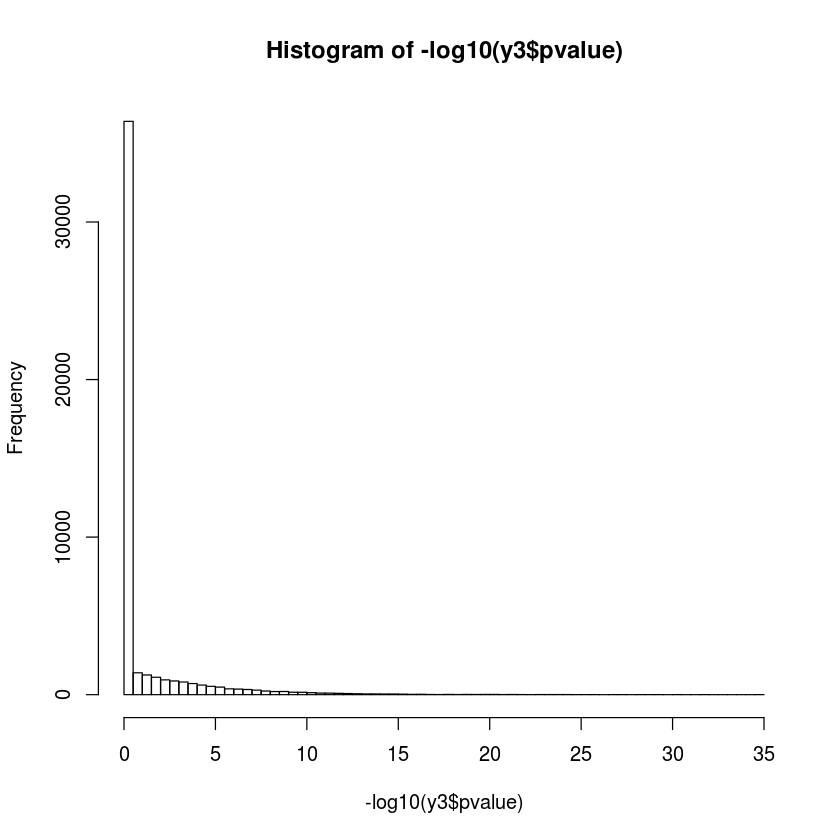

In [16]:
hist(-log10(y3$pvalue),breaks=100)

histogram of correlation coefficients (r)

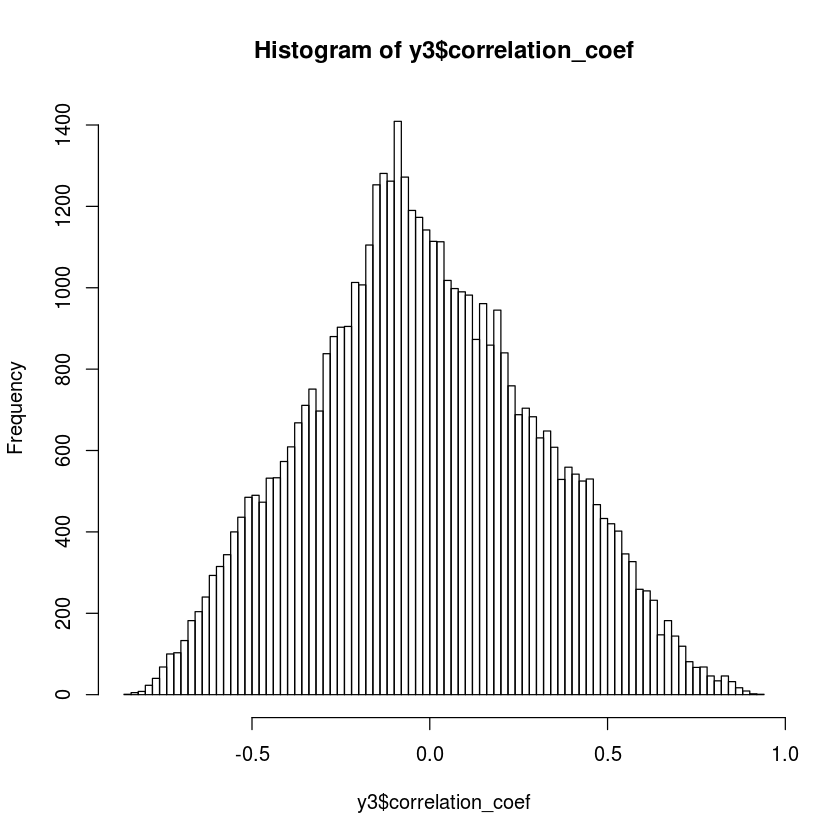

In [17]:
hist(y3$correlation_coef,breaks=100)

### Calculate the correlation of each feature with all remaining features

In [18]:
ccs <- as.matrix(tab2[,-nonfeatures])
corrions <- rcorr(ccs, type="pearson") # You can also use "spearman"

create heatmap of correlation coefficient with all features

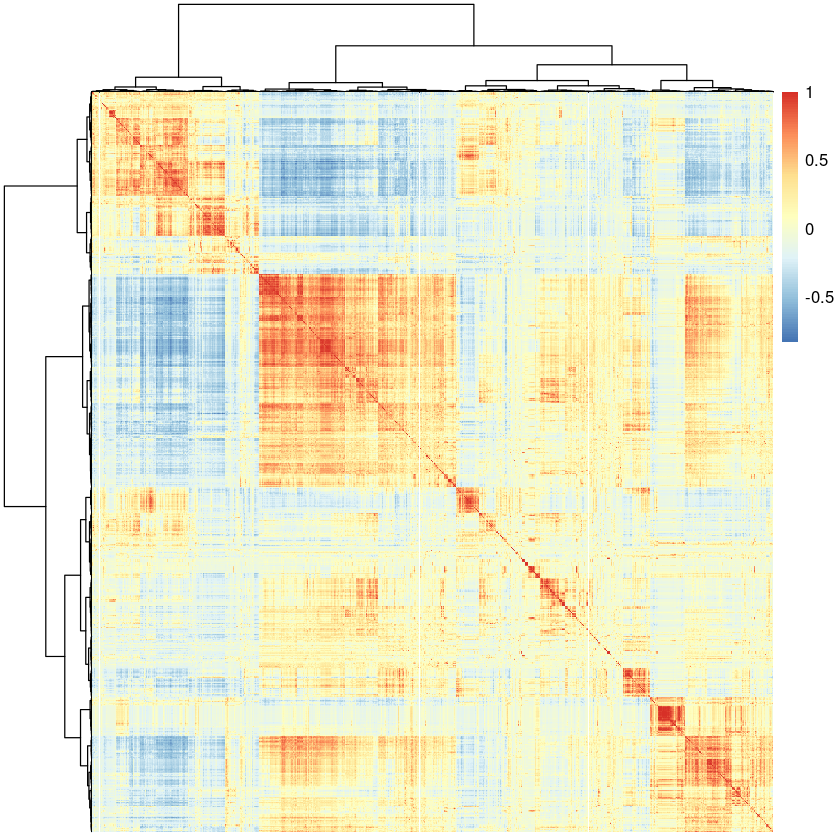

In [20]:
# create heatmap
pheatmap(corrions$r, clustering_method="ward.D", clustering_distance_cols="euclidean", show_colnames=FALSE, show_rownames=FALSE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=5)

create interactive heatmap <br>
**careful: depending on how many features you have this might take a long time, if you want to save time skip this step**

In [21]:
# interactive 3d map
map <- d3heatmap(corrions$r, distfun=function(x) dist(x, method="euclidean"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_features.html") 

remove features, which show no significant p-value for any other feature

In [22]:
pcorrected <- p.adjust(as.vector(corrions$P))
pcorrected <- matrix(pcorrected,nrow=nrow(corrions$P),ncol=ncol(corrions$P))
colnames(pcorrected) <- rownames(pcorrected) <- colnames(corrions$P)

# remove features with no significant p-value
corrions_sig <- corrions$r[-which(apply(pcorrected,1,min,na.rm = TRUE)>0.05),]

create heatmap with reduced dataset <br>
**careful: depending on how many features you have this might take a long time, if you want to save time skip this step**

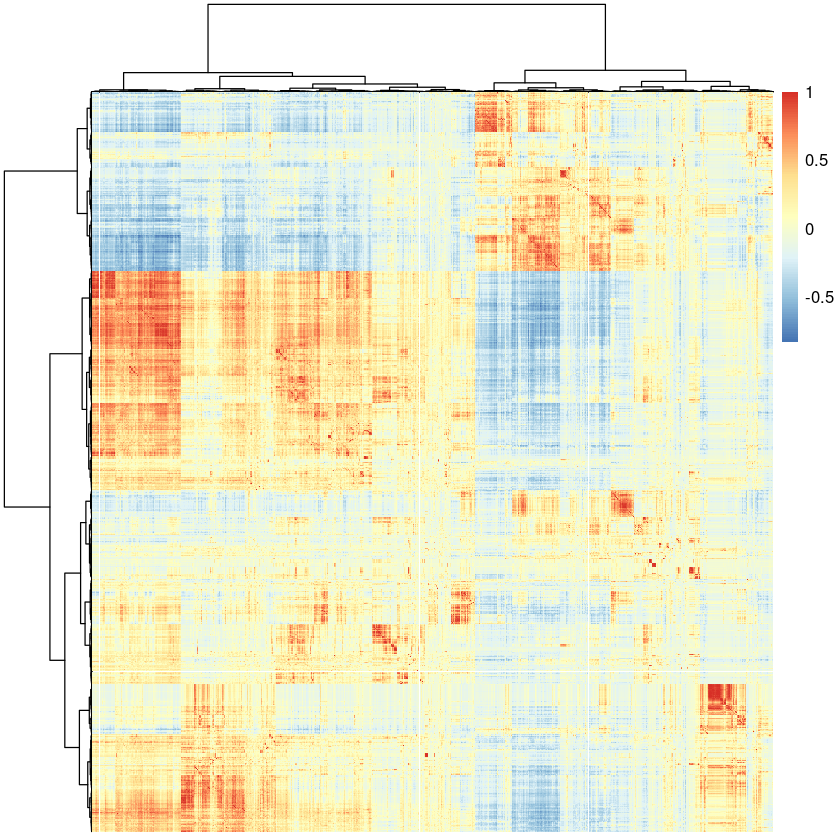

In [23]:
# create heatmap
pheatmap(corrions_sig,  clustering_method="ward.D", clustering_distance_cols="euclidean", show_colnames=FALSE,show_rownames=FALSE, cluster_rows=TRUE, cluster_cols=TRUE, fontsize_row=5)

create interactive heatmap with reduced matrix <br>
**careful: depending on how many features you have this might take a long time, if you want to save time skip this step**

In [24]:
# interactive 3d map
map <- d3heatmap(corrions_sig, distfun=function(x) dist(x, method="euclidean"), hclustfun=function(x) hclust(x, method="ward.D"),color = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(100))
saveWidget(map, "corrcoef_features_sig.html") 

create output tables

In [25]:
corrions2 <- as.data.frame(pcorrected,stringsAsFactors = F)
corrions2 <- cbind(rownames(corrions2),corrions2)
rownames(corrions2) <- NULL
colnames(corrions2)[1] <- "features"
corrions3 <- melt(corrions2)

cf <- as.data.frame(corrions$r,stringsAsFactors = F)
cf <- cbind(rownames(cf),cf)
rownames(cf) <- NULL
colnames(cf)[1] <- "features"
cf2 <- melt(cf)

allfeat <- cbind(corrions3[,c(1:3)],cf2[,3])
allfeat <- cbind(allfeat, (cf2[,3])^2)
colnames(allfeat)[c(1,3:5)] <- c("Feature","pvalue","correlation_coef","r2")
head(allfeat)
dim(allfeat)

Using features as id variables
Using features as id variables


Feature,variable,pvalue,correlation_coef,r2
999_659.386_13.06_N/A_0ppm,999_659.386_13.06_N/A_0ppm,NA,1.00000000,1.000000000
998_499.2012_6.41_N/A_0ppm,999_659.386_13.06_N/A_0ppm,1,-0.27566472,0.075991036
997_443.2375_9.51_N/A_0ppm,999_659.386_13.06_N/A_0ppm,1,-0.14296453,0.020438856
996_219.1955_9.9_Spectral Match to Dibutyl phthalate from NIST14_214800ppm,999_659.386_13.06_N/A_0ppm,1,-0.09800933,0.009605829
995_452.2021_5.66_N/A_0ppm,999_659.386_13.06_N/A_0ppm,1,-0.19169237,0.036745964
994_659.2706_7.55_N/A_0ppm,999_659.386_13.06_N/A_0ppm,1,-0.23483187,0.055146007


[1] 10361961        5

write table to file

In [26]:
# write table to file
write.table(allfeat,"CorrelationTable_Features.csv",row.names = F,quote = F,sep=";")

reduce dimensions of feature correlations by e.g. removing all correlations with p-value < 0.05 (careful, you could remove features)

In [27]:
allfeatsig <- allfeat[which(allfeat$pvalue<0.05 & abs(allfeat$correlation_coef) > 0.5 | is.na(allfeat$pvalue)),]
dim(allfeatsig)

[1] 485101      5

write reduced table to file

In [28]:
write.table(allfeatsig,"CorrelationTable_FeaturesSig.csv",row.names = F,quote = F,sep=";")

create histogram of log p-values

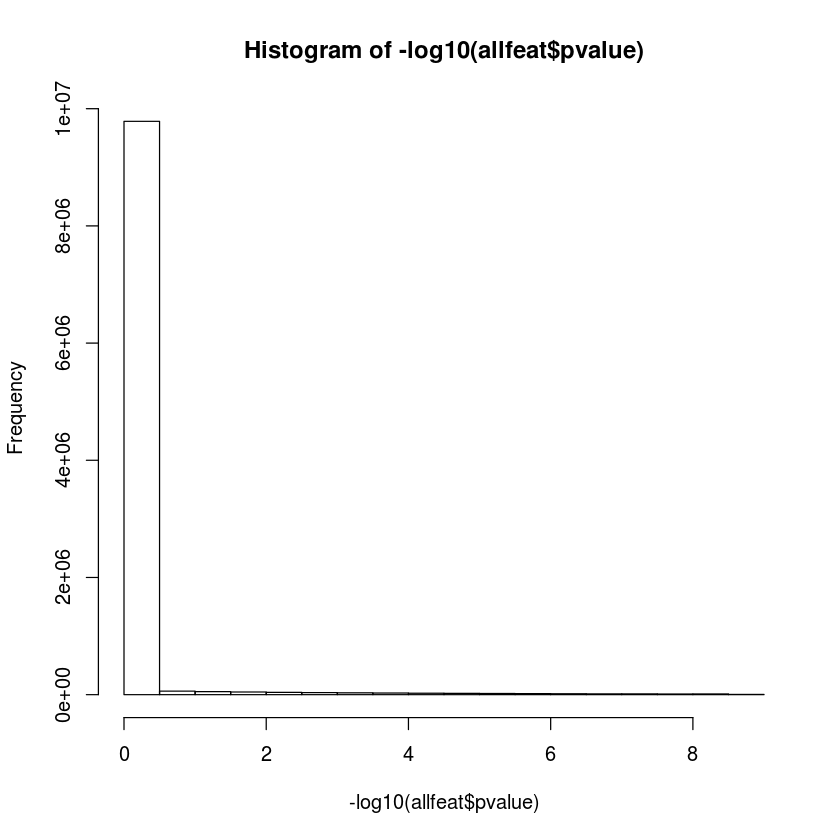

In [29]:
hist(-log10(allfeat$pvalue),breaks=20)

create histogram of correlation coefficients

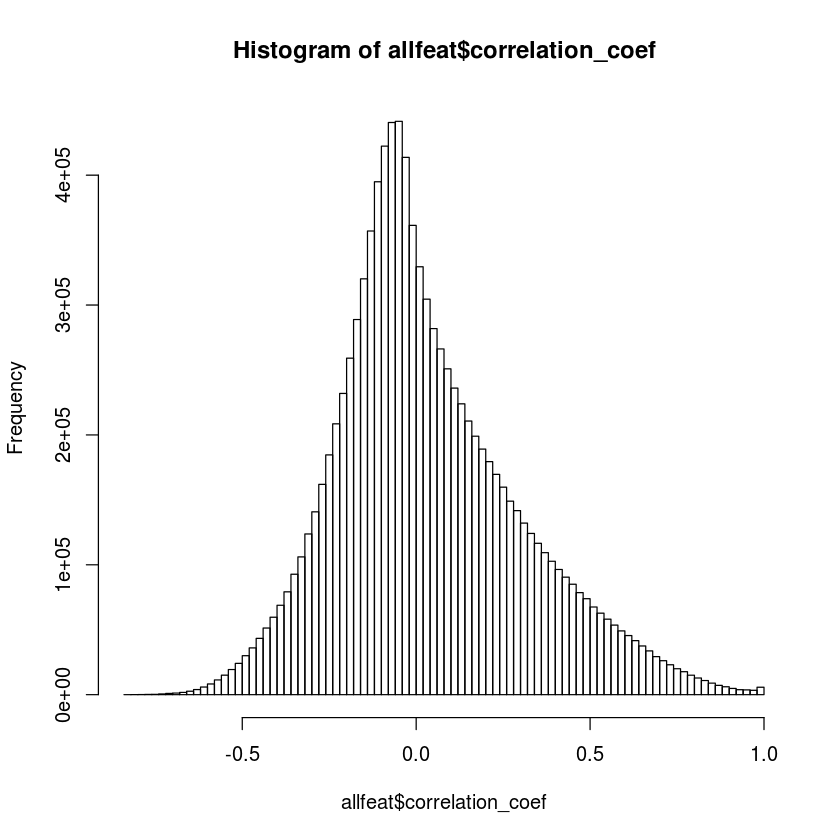

In [30]:
hist(allfeat$correlation_coef,breaks=100)